In [1]:

import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import xarray as xr

from mapper_functions import plot_global_tight, plot_global_tight_pcm

In [3]:
from my_functions import read_obsfcstana_extend_datetime
#path = f'../test_data/{comp_dir}/'
path = '/discover/nobackup/amfox/Experiments/M21C_land_sweeper_OLv8_M36/LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2020/M04'
file_name_start = 'LS_OLv8_M36.ens_avg.ldas_ObsFcstAna.20200430_12'
printflag = True
date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)

date_time = np.array(date_time)
obs_species = np.array(obs_species)
obs_tilenum = np.array(obs_tilenum)
obs_lon = np.array(obs_lon)
obs_lat = np.array(obs_lat)
obs_obs = np.array(obs_obs)
obs_fcst = np.array(obs_fcst)
obs_ana = np.array(obs_ana)

['/discover/nobackup/amfox/Experiments/M21C_land_sweeper_OLv8_M36/LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2020/M04/LS_OLv8_M36.ens_avg.ldas_ObsFcstAna.20200430_1200z.bin']
Reading file  /discover/nobackup/amfox/Experiments/M21C_land_sweeper_OLv8_M36/LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2020/M04/LS_OLv8_M36.ens_avg.ldas_ObsFcstAna.20200430_1200z.bin ...


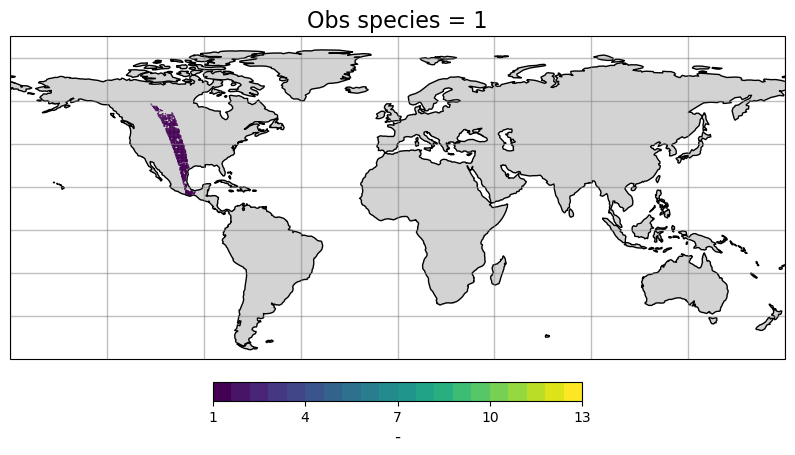

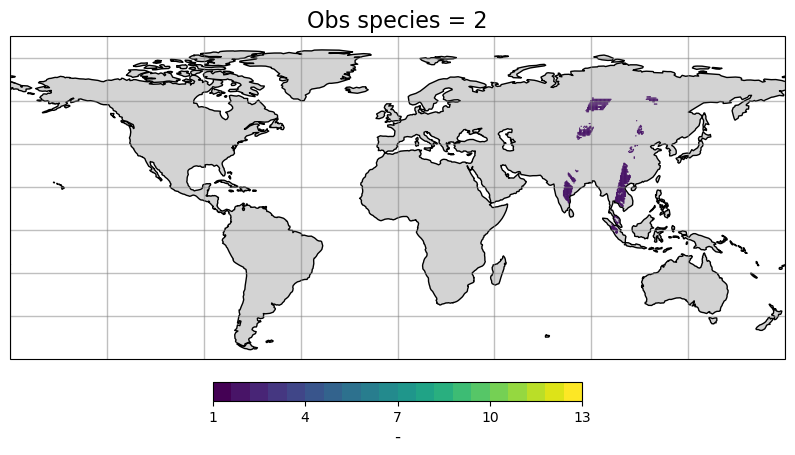

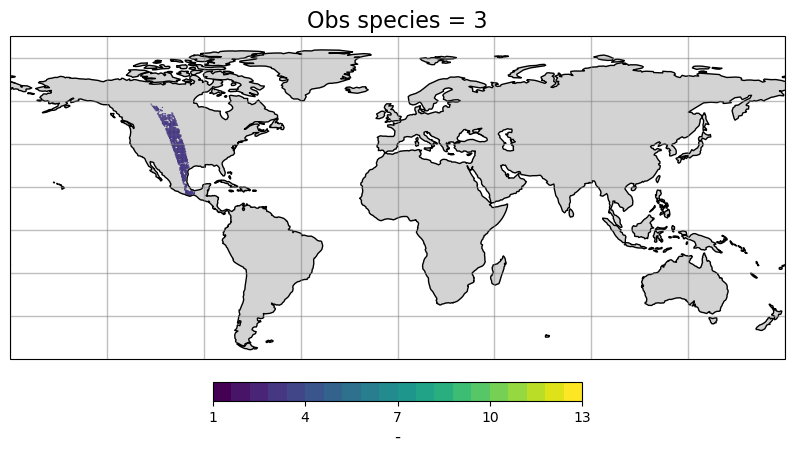

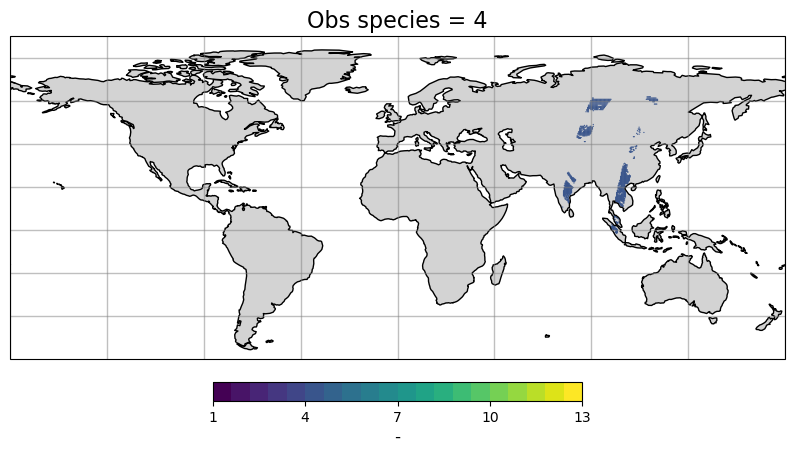

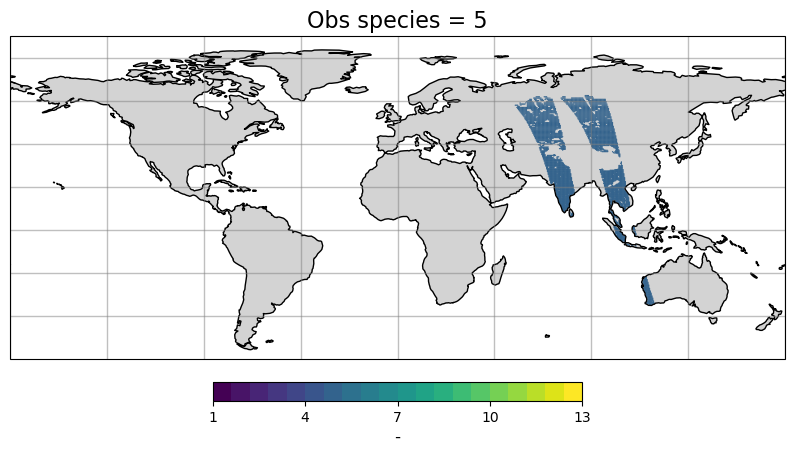

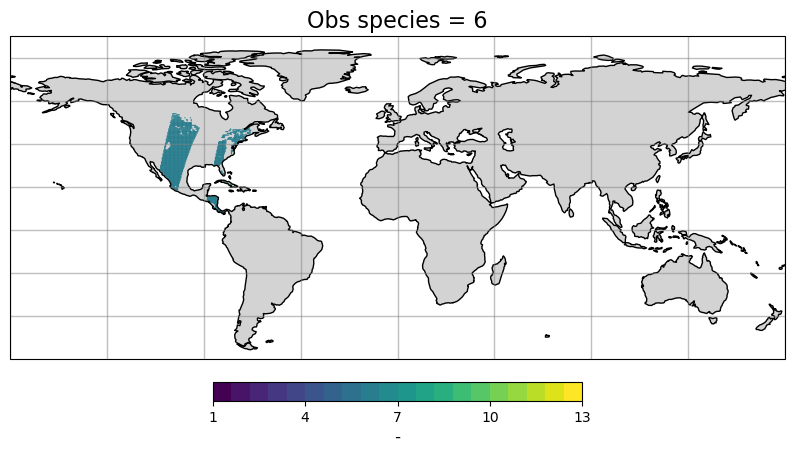

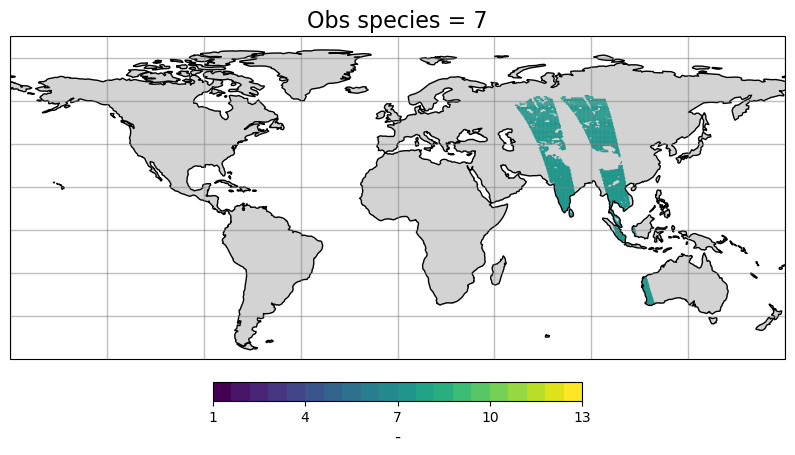

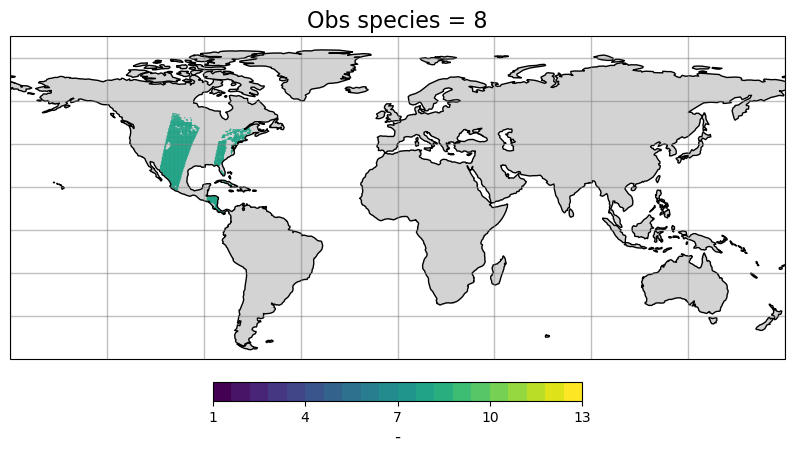

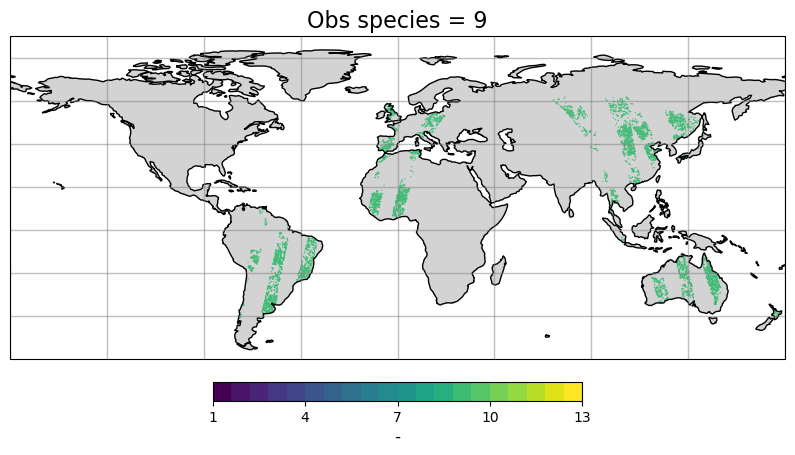

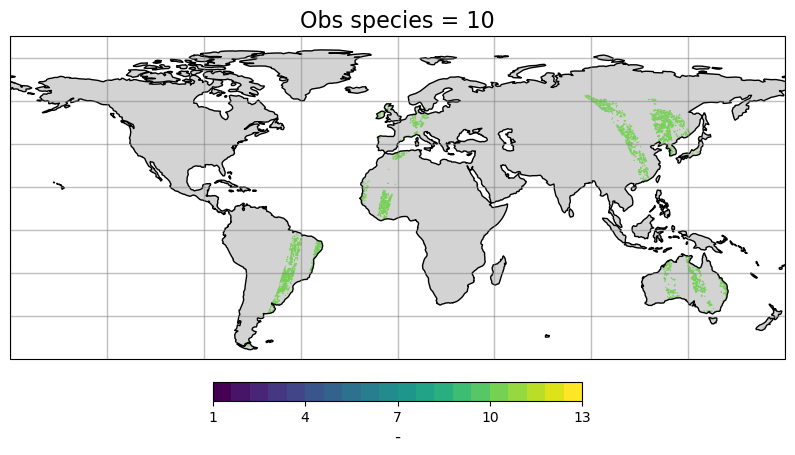

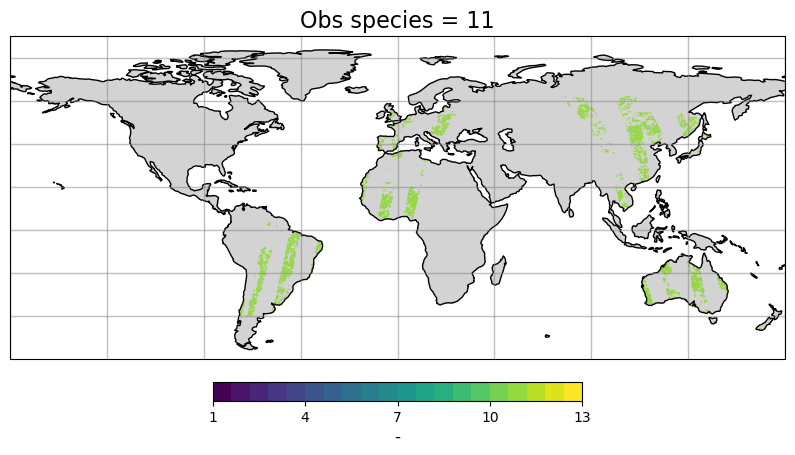

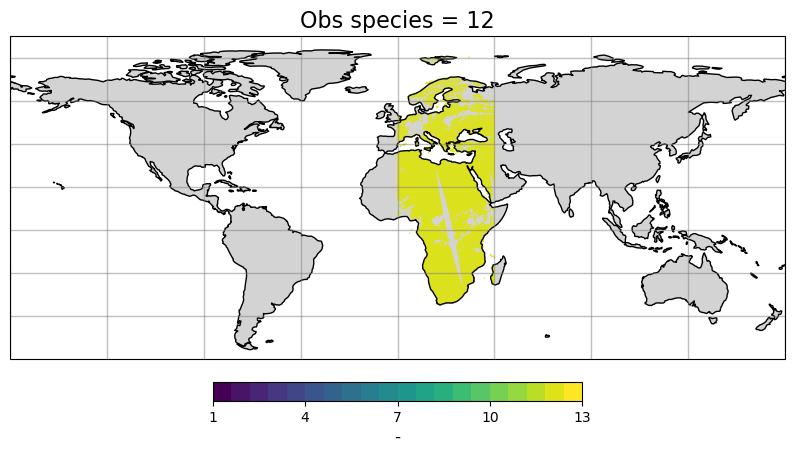

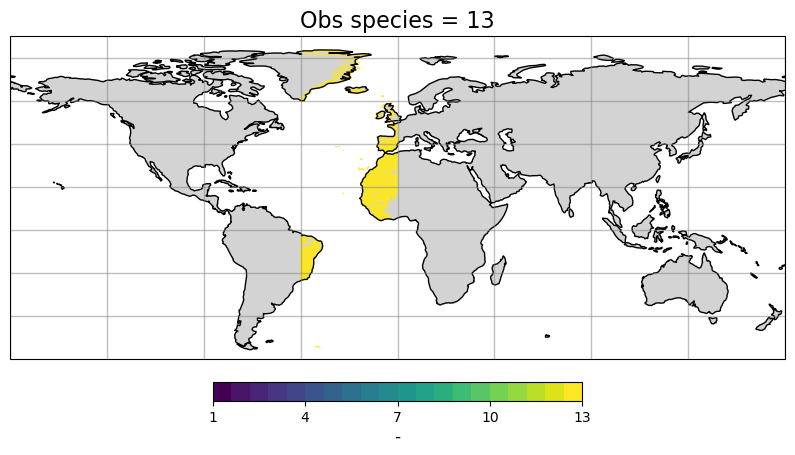

In [4]:
for i in range(1, 14):
    n_obs = len(obs_obs[obs_species == i])
    obarray = np.empty([n_obs, 3])
    obarray.fill(np.nan)
    obarray[:, 1] = obs_lon[obs_species == i]
    obarray[:, 2] = obs_lat[obs_species == i]
    obarray[:, 0] = obs_species[obs_species == i]
    plot_global_tight(obarray, False, f'Obs species = {i}', '-', 1, 13)

Max:  36.73457336425781
Min:  -38.445831298828125


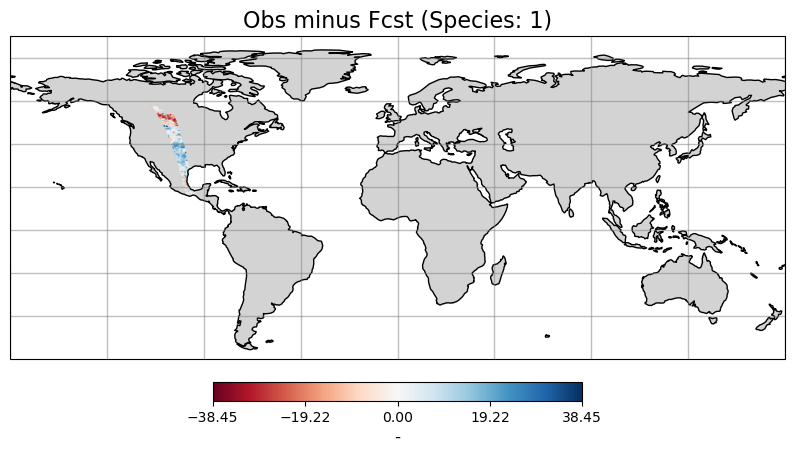

Max:  40.7412109375
Min:  -45.39143371582031


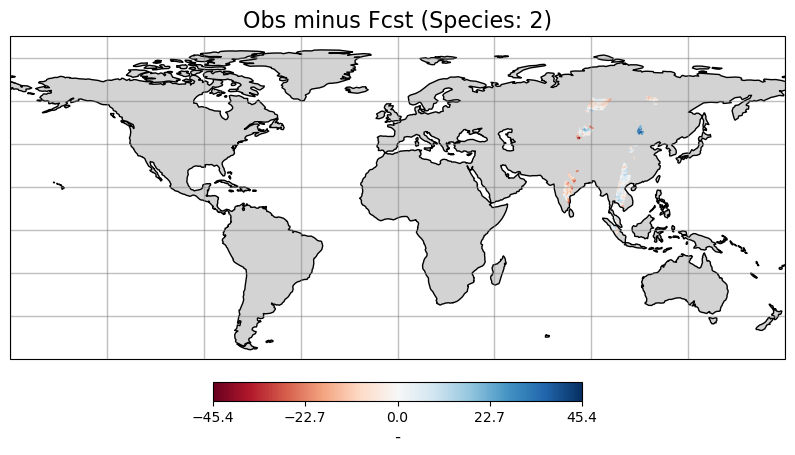

Max:  30.766860961914062
Min:  -27.725234985351562


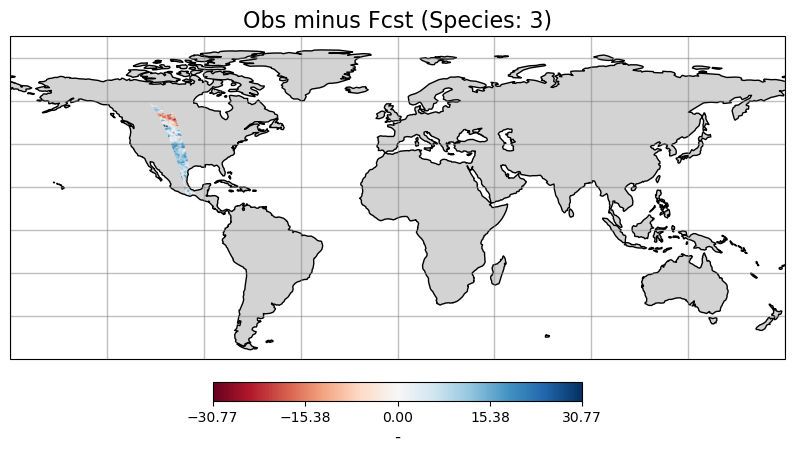

Max:  26.58807373046875
Min:  -36.53724670410156


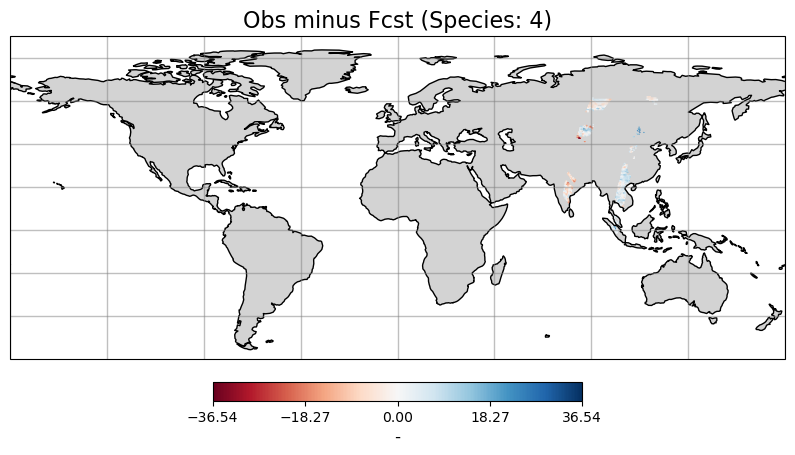

Max:  40.23481750488281
Min:  -94.24969482421875


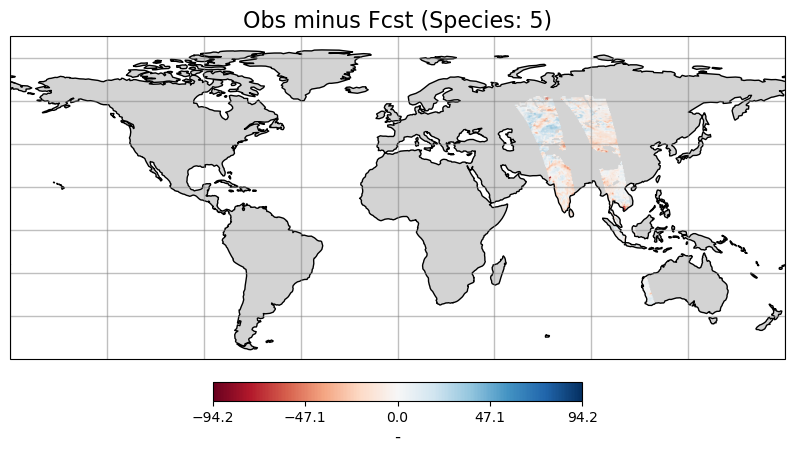

Max:  43.21012878417969
Min:  -39.25518798828125


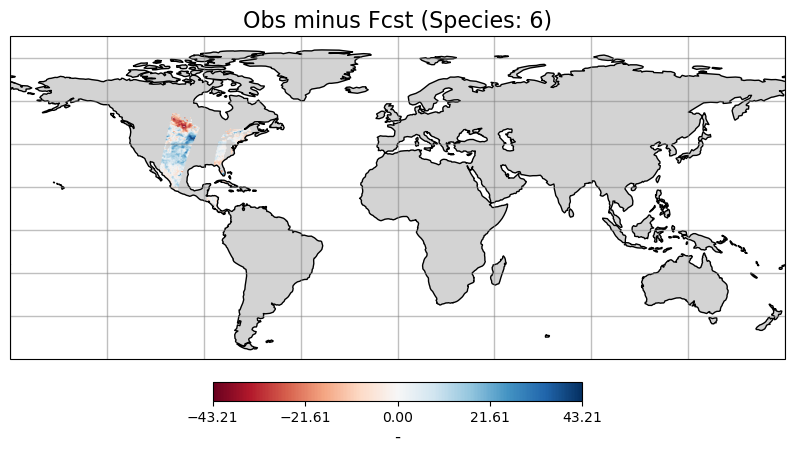

Max:  32.42900085449219
Min:  -85.81756591796875


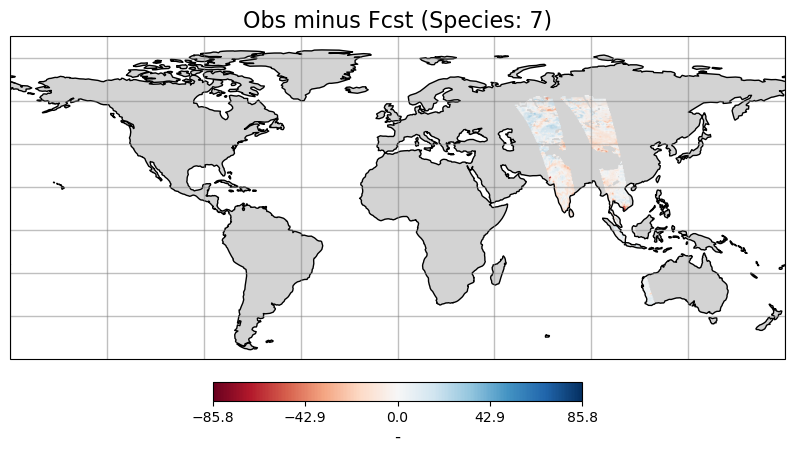

Max:  35.98194885253906
Min:  -32.20783996582031


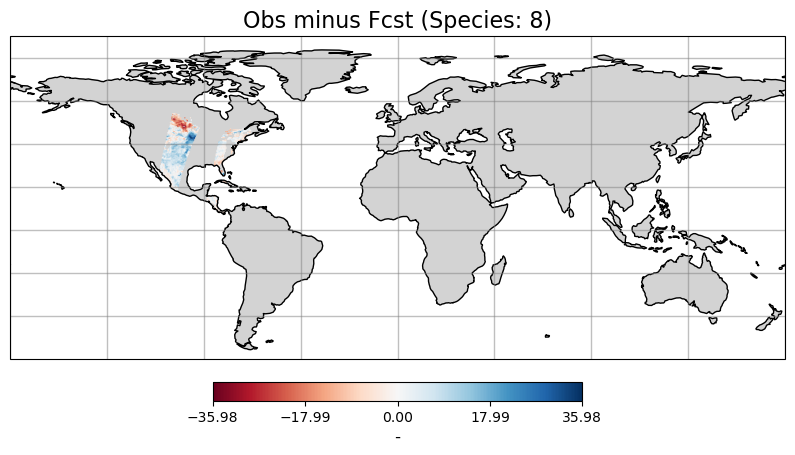

Max:  0.8814325407147408
Min:  -0.3378101587295532


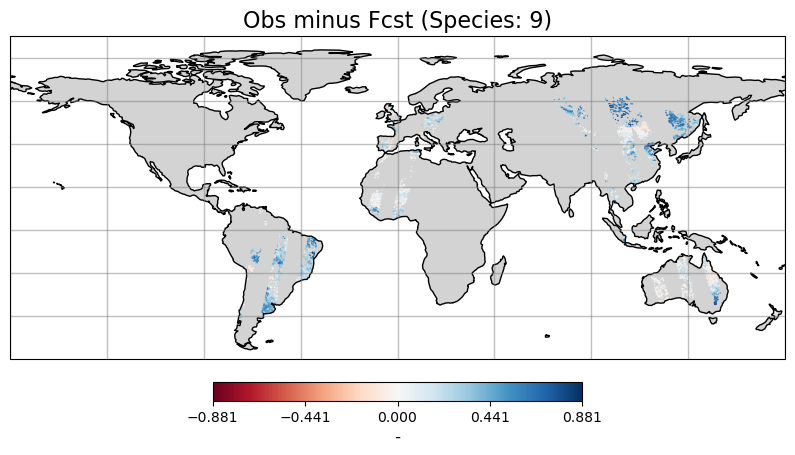

Max:  0.8324185460805893
Min:  -0.3526669703423977


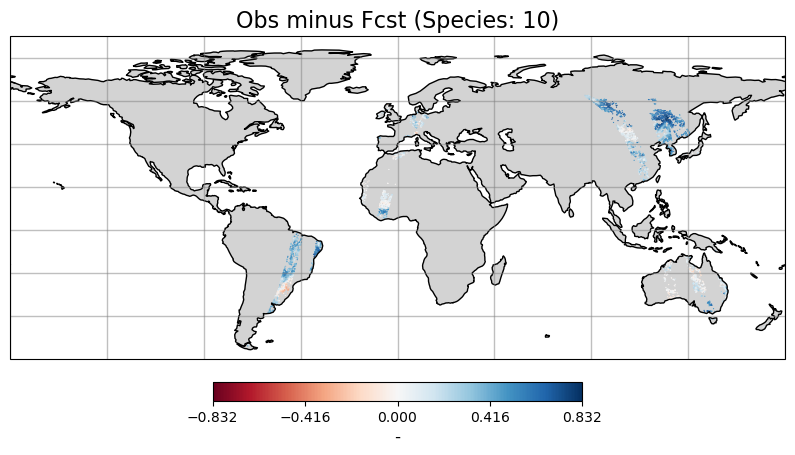

Max:  0.8332275152206421
Min:  -0.35018259659409523


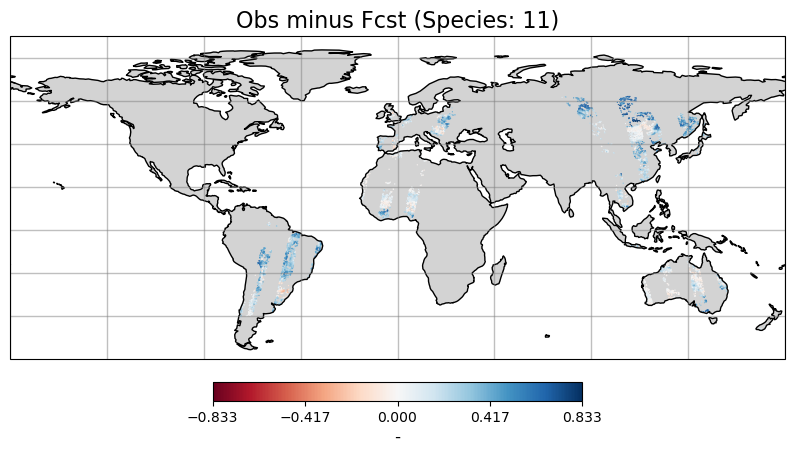

Max:  1.0
Min:  -0.766045518219471


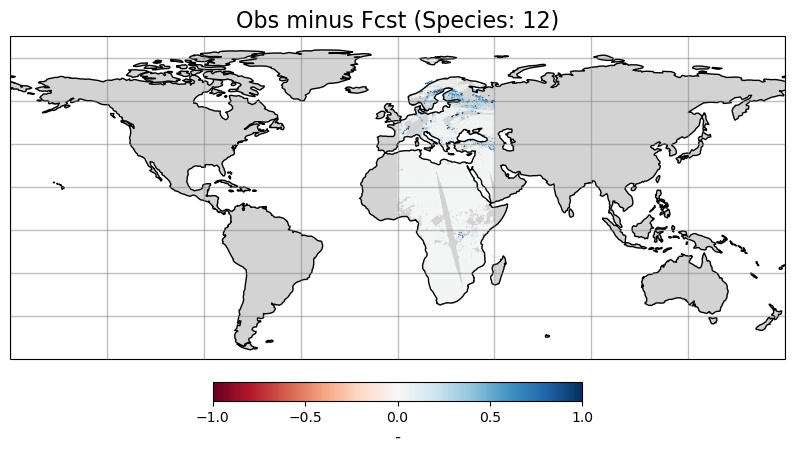

Max:  1.0
Min:  -1.0


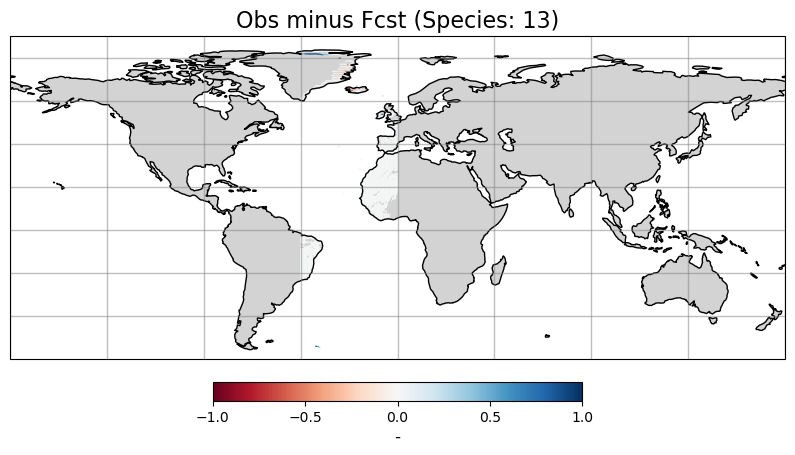

In [5]:
for i in range(1, 14):
    #if i == 11:
    #    continue
    n_obs = len(obs_obs[obs_species == i])
    obarray = np.empty([n_obs, 3])
    obarray.fill(np.nan)
    obarray[:, 1] = obs_lon[obs_species == i]
    obarray[:, 2] = obs_lat[obs_species == i]
    obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
    print('Max: ',np.nanmax(obarray[:, 0]))
    print('Min: ', np.nanmin(obarray[:, 0]))
    plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-')

In [ ]:
i = 8

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_obs[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Obs (Species: {i})', '-', 0, 1)

obarray[:, 0] = obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Fcst (Species: {i})', '-', 0, 1)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -1, 1)

#obarray[:, 0][obarray[:, 0] == 0] = np.nan
#print('Max: ',np.nanmax(obarray[:, 0]))
#print('Min: ', np.nanmin(obarray[:, 0]))
#plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -1, 1)

omf = obarray[:, 0].copy()

obarray[:, 0] = obs_ana[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Ana (Species: {i})', '-', 0, 1)

obarray[:, 0] = obs_ana[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.4, 0.4)

#obarray[:, 0][obarray[:, 0] == 0] = np.nan
#print('Max: ',np.nanmax(obarray[:, 0]))
#print('Min: ', np.nanmin(obarray[:, 0]))
#plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.4, 0.4)

inc = obarray[:, 0]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

# Make a scatter plot of omf v. inc
plt.figure(figsize=(8,8))
plt.scatter(omf, inc, s=1)
plt.xlabel('Obs Minus Fcst')
plt.ylabel('Increment')
plt.title('Obs Minus Fcst v. Increment')
plt.grid()
plt.show()

In [ ]:
i = 9

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_obs[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Obs (Species: {i})', '-', 0, 1)

obarray[:, 0] = obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Fcst (Species: {i})', '-', 0, 1)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -1, 1)

#obarray[:, 0][obarray[:, 0] == 0] = np.nan
#print('Max: ',np.nanmax(obarray[:, 0]))
#print('Min: ', np.nanmin(obarray[:, 0]))
#plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -1, 1)

omf = obarray[:, 0].copy()

obarray[:, 0] = obs_ana[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Ana (Species: {i})', '-', 0, 1)

obarray[:, 0] = obs_ana[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.4, 0.4)

#obarray[:, 0][obarray[:, 0] == 0] = np.nan
#print('Max: ',np.nanmax(obarray[:, 0]))
#print('Min: ', np.nanmin(obarray[:, 0]))
#plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.4, 0.4)

inc = obarray[:, 0]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

# Make a scatter plot of omf v. inc
plt.figure(figsize=(8,8))
plt.scatter(omf, inc, s=1)
plt.xlabel('Obs Minus Fcst')
plt.ylabel('Increment')
plt.title('Obs Minus Fcst v. Increment')
plt.grid()
plt.show()

In [ ]:
#path = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01'
#file_name_start = 'DAv7_M36_SMAP_ASCAT_SNOW_up_new.ens_avg.ldas_ObsFcstAna.20160101'
printflag = True
date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)

date_time = np.array(date_time)
obs_species = np.array(obs_species)
obs_tilenum = np.array(obs_tilenum)
obs_lon = np.array(obs_lon)
obs_lat = np.array(obs_lat)
obs_obs = np.array(obs_obs)
obs_fcst = np.array(obs_fcst)

In [ ]:
i = 1

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_obs[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

plot_global_tight(obarray, False, f'Obs Obs (Species: {i})', '-', 150, 300)

obarray[:, 0] = obs_fcst[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Fcst (Species: {i})', '-', 150, 300)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -50, 50)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -50, 50)

omf = obarray[:, 0].copy()

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

obarray[:, 0] = obs_ana[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Ana (Species: {i})', '-', 150, 300)

obarray[:, 0] = obs_ana[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -50, 50)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
obarray[:, 0][obarray[:, 0] < -100] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -50, 50)

inc = obarray[:, 0]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

# Make a scatter plot of omf v. inc
plt.figure(figsize=(8,8))
plt.scatter(omf, inc, s=1)
plt.xlabel('Obs Minus Fcst')
plt.ylabel('Increment')
plt.title('Obs Minus Fcst v. Increment')
plt.grid()
plt.show()

In [ ]:
i = 2

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_obs[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

plot_global_tight(obarray, False, f'Obs Obs (Species: {i})', '-', 150, 300)

obarray[:, 0] = obs_fcst[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Fcst (Species: {i})', '-', 150, 300)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -50, 50)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -50, 50)

omf = obarray[:, 0].copy()

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

obarray[:, 0] = obs_ana[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Ana (Species: {i})', '-', 150, 300)

obarray[:, 0] = obs_ana[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -50, 50)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
obarray[:, 0][obarray[:, 0] < -100] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -50, 50)

inc = obarray[:, 0]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

# Make a scatter plot of omf v. inc
plt.figure(figsize=(8,8))
plt.scatter(omf, inc, s=1)
plt.xlabel('Obs Minus Fcst')
plt.ylabel('Increment')
plt.title('Obs Minus Fcst v. Increment')
plt.grid()
plt.show()

In [ ]:
i = 5

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_obs[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

plot_global_tight(obarray, False, f'Obs Obs (Species: {i})', '-', 0, 0.8)

obarray[:, 0] = obs_fcst[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Fcst (Species: {i})', '-', 0, 0.8)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -0.2, 0.2)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -0.2, 0.2)

omf = obarray[:, 0].copy()

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

obarray[:, 0] = obs_ana[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Ana (Species: {i})', '-', 0, 0.8)

obarray[:, 0] = obs_ana[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.2, 0.2)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.2, 0.2)

inc = obarray[:, 0]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

# Make a scatter plot of omf v. inc
plt.figure(figsize=(8,8))
plt.scatter(omf, inc, s=1)
plt.xlabel('Obs Minus Fcst')
plt.ylabel('Increment')
plt.title('Obs Minus Fcst v. Increment')
plt.grid()
plt.show()

In [ ]:
i = 6

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_obs[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

plot_global_tight(obarray, False, f'Obs Obs (Species: {i})', '-', 0, 0.8)

obarray[:, 0] = obs_fcst[obs_species == i]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Fcst (Species: {i})', '-', 0, 0.8)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -0.2, 0.2)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs minus Fcst (Species: {i})', '-', -0.2, 0.2)

omf = obarray[:, 0].copy()

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

obarray[:, 0] = obs_ana[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Obs Ana (Species: {i})', '-', 0, 0.8)

obarray[:, 0] = obs_ana[obs_species == i] - obs_fcst[obs_species == i]
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.2, 0.2)

obarray[:, 0][obarray[:, 0] == 0] = np.nan
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'Increment (Species: {i})', '-', -0.2, 0.2)

inc = obarray[:, 0]

print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))

# Make a scatter plot of omf v. inc
plt.figure(figsize=(8,8))
plt.scatter(omf, inc, s=1)
plt.xlabel('Obs Minus Fcst')
plt.ylabel('Increment')
plt.title('Obs Minus Fcst v. Increment')
plt.grid()
plt.show()

In [ ]:
import xarray as xr

file = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new.catch_progn_incr.20160101_0300z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

catdef_incr_n = ds['CATDEF_INCR']
srfexc_incr_n = ds['SRFEXC_INCR']
rzexc_incr_n = ds['RZEXC_INCR']
wesnn1_incr_n = ds['WESNN1_INCR']
wesnn2_incr_n = ds['WESNN2_INCR']
wesnn3_incr_n = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up11/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/DAv7_M36_SMAP_ASCAT_SNOW_up11.catch_progn_incr.20160101_0300z.nc4'

ds = xr.open_dataset(file)
        
catdef_incr_11 = ds['CATDEF_INCR']
srfexc_incr_11 = ds['SRFEXC_INCR']
rzexc_incr_11 = ds['RZEXC_INCR']
wesnn1_incr_11 = ds['WESNN1_INCR']
wesnn2_incr_11 = ds['WESNN2_INCR']
wesnn3_incr_11 = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/DAv7_M36_SMAP_ASCAT_SNOW_up13.catch_progn_incr.20160101_0300z.nc4'

ds = xr.open_dataset(file)
        
catdef_incr_13 = ds['CATDEF_INCR']
srfexc_incr_13 = ds['SRFEXC_INCR']
rzexc_incr_13 = ds['RZEXC_INCR']
wesnn1_incr_13 = ds['WESNN1_INCR']
wesnn2_incr_13 = ds['WESNN2_INCR']
wesnn3_incr_13 = ds['WESNN3_INCR']
            
ds.close()

In [ ]:
diff = srfexc_incr_13 - srfexc_incr_n

# Compare the two wesnn1_incr variables using scatter plot
plt.scatter(srfexc_incr_13, diff, s=1)
plt.xlabel('up_13')
plt.ylabel('Difference')
#plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of wesnn1_incr values: 20160101_0300z')
plt.show()


In [ ]:
n_tiles = len(lon)
obarray = np.empty([n_tiles, 3])
obarray.fill(np.nan)

obarray[:, 1] = lon
obarray[:, 2] = lat


In [ ]:
obarray[:, 0] = wesnn1_incr_n
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'wesnn1_incr (new_13)', '-', -0.4, 0.4)

obarray[:, 0] = wesnn1_incr_11
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'wesnn1_incr (up_11)', '-', -0.4, 0.4)

# Compare the two wesnn1_incr variables using scatter plot
plt.scatter(wesnn1_incr_n, wesnn1_incr_11, s=1)
plt.xlabel('new_13')
plt.ylabel('up_11')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of wesnn1_incr values: 20160101_0300z')
plt.show()

# Compare the two wesnn1_incr variables using pdf plot after removing zero values, make one a histrogram with bars and the other a histogram with a line
wesnn1_incr_n_array = wesnn1_incr_n.values
wesnn1_incr_11_array = wesnn1_incr_11.values

wesnn1_incr_n_array = wesnn1_incr_n_array[wesnn1_incr_n_array != 0]
wesnn1_incr_11_array = wesnn1_incr_11_array[wesnn1_incr_11_array != 0]

plt.hist(wesnn1_incr_n_array, bins=100, alpha=0.5, label='new_13')
plt.hist(wesnn1_incr_11_array, bins=100, alpha=0.5, label='up_11', histtype='step')
plt.xlabel('wesnn1_incr')
plt.ylabel('Frequency')
plt.title('Histogram of wesnn1_incr values')
plt.legend()
plt.show()

In [ ]:
obarray[:, 0] = srfexc_incr_n
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'srfexc_incr (new_13)', '-', -3, 3)

obarray[:, 0] = srfexc_incr_13
print('Max: ',np.nanmax(obarray[:, 0]))
print('Min: ', np.nanmin(obarray[:, 0]))
plot_global_tight(obarray, False, f'srfexc_incr (up_13)', '-', -3, 3)

# Compare the two srfexc_incr variables using scatter plot
plt.scatter(srfexc_incr_n, srfexc_incr_13, s=1)
plt.xlabel('new_13')
plt.ylabel('up_13')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of srfexc_incr values: 20160101_0300z')
plt.show()

# Comnpare the two srfexc_incr variables using pdf plot after removing zero values, make one a histrogram with bars and the other a histogram with a line
srfexc_incr_n_array = srfexc_incr_n.values
srfexc_incr_13_array = srfexc_incr_13.values

srfexc_incr_n_array = srfexc_incr_n_array[srfexc_incr_n_array != 0]
srfexc_incr_13_array = srfexc_incr_13_array[srfexc_incr_13_array != 0]

plt.hist(srfexc_incr_n_array, bins=100, alpha=0.5, label='new_13')
plt.hist(srfexc_incr_13_array, bins=100, alpha=0.5, label='up_13', histtype='step')
plt.xlabel('srfexc_incr')
plt.ylabel('Frequency')
plt.title('Histogram of srfexc_incr values')
plt.legend()

In [ ]:
file = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new.catch_progn_incr.20160101_0600z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

catdef_incr_n = ds['CATDEF_INCR']
srfexc_incr_n = ds['SRFEXC_INCR']
rzexc_incr_n = ds['RZEXC_INCR']
wesnn1_incr_n = ds['WESNN1_INCR']
wesnn2_incr_n = ds['WESNN2_INCR']
wesnn3_incr_n = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up11/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/DAv7_M36_SMAP_ASCAT_SNOW_up11.catch_progn_incr.20160101_0600z.nc4'

ds = xr.open_dataset(file)
        
catdef_incr_11 = ds['CATDEF_INCR']
srfexc_incr_11 = ds['SRFEXC_INCR']
rzexc_incr_11 = ds['RZEXC_INCR']
wesnn1_incr_11 = ds['WESNN1_INCR']
wesnn2_incr_11 = ds['WESNN2_INCR']
wesnn3_incr_11 = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/DAv7_M36_SMAP_ASCAT_SNOW_up13.catch_progn_incr.20160101_0600z.nc4'

ds = xr.open_dataset(file)
        
catdef_incr_13 = ds['CATDEF_INCR']
srfexc_incr_13 = ds['SRFEXC_INCR']
rzexc_incr_13 = ds['RZEXC_INCR']
wesnn1_incr_13 = ds['WESNN1_INCR']
wesnn2_incr_13 = ds['WESNN2_INCR']
wesnn3_incr_13 = ds['WESNN3_INCR']
            
ds.close()

In [ ]:
# Compare the two wesnn1_incr variables using scatter plot
plt.scatter(wesnn1_incr_n, wesnn1_incr_11, s=1)
plt.xlabel('new_13')
plt.ylabel('up_11')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of wesnn1_incr values: 20160101_0600z')
plt.show()

In [ ]:
# Compare the two srfexc_incr variables using scatter plot
plt.scatter(srfexc_incr_n, srfexc_incr_13, s=1)
plt.xlabel('new_13')
plt.ylabel('up_13')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of srfexc_incr values: 20160101_0600z')
plt.show()

In [ ]:
file = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new.catch_progn_incr.20160101_1200z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

catdef_incr_n = ds['CATDEF_INCR']
srfexc_incr_n = ds['SRFEXC_INCR']
rzexc_incr_n = ds['RZEXC_INCR']
wesnn1_incr_n = ds['WESNN1_INCR']
wesnn2_incr_n = ds['WESNN2_INCR']
wesnn3_incr_n = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up11/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/DAv7_M36_SMAP_ASCAT_SNOW_up11.catch_progn_incr.20160101_1200z.nc4'

ds = xr.open_dataset(file)
        
catdef_incr_11 = ds['CATDEF_INCR']
srfexc_incr_11 = ds['SRFEXC_INCR']
rzexc_incr_11 = ds['RZEXC_INCR']
wesnn1_incr_11 = ds['WESNN1_INCR']
wesnn2_incr_11 = ds['WESNN2_INCR']
wesnn3_incr_11 = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/DAv7_M36_SMAP_ASCAT_SNOW_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/DAv7_M36_SMAP_ASCAT_SNOW_up13.catch_progn_incr.20160101_1200z.nc4'

ds = xr.open_dataset(file)
        
catdef_incr_13 = ds['CATDEF_INCR']
srfexc_incr_13 = ds['SRFEXC_INCR']
rzexc_incr_13 = ds['RZEXC_INCR']
wesnn1_incr_13 = ds['WESNN1_INCR']
wesnn2_incr_13 = ds['WESNN2_INCR']
wesnn3_incr_13 = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SMAP_ASCAT_up_new/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/test_DAv7_M36_SMAP_ASCAT_up_new.catch_progn_incr.20160101_1200z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

catdef_incr_nsa = ds['CATDEF_INCR']
srfexc_incr_nsa = ds['SRFEXC_INCR']
rzexc_incr_nsa = ds['RZEXC_INCR']
wesnn1_incr_nsa = ds['WESNN1_INCR']
wesnn2_incr_nsa = ds['WESNN2_INCR']
wesnn3_incr_nsa = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/test_DAv7_M36_SNOW_up_new.catch_progn_incr.20160101_1200z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

catdef_incr_ns = ds['CATDEF_INCR']
srfexc_incr_ns = ds['SRFEXC_INCR']
rzexc_incr_ns = ds['RZEXC_INCR']
wesnn1_incr_ns = ds['WESNN1_INCR']
wesnn2_incr_ns = ds['WESNN2_INCR']
wesnn3_incr_ns = ds['WESNN3_INCR']
            
ds.close()

file = '/discover/nobackup/amfox/Experiments/snda_2day/test_incr_DAv7_M36_SMAP_ASCAT_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/test_incr_DAv7_M36_SMAP_ASCAT_SNOW_up_new.catch_progn_incr.20160101_1200z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

catdef_incr_test = ds['CATDEF_INCR']
srfexc_incr_test = ds['SRFEXC_INCR']
rzexc_incr_test = ds['RZEXC_INCR']
wesnn1_incr_test = ds['WESNN1_INCR']
wesnn2_incr_test = ds['WESNN2_INCR']
wesnn3_incr_test = ds['WESNN3_INCR']
            
ds.close()

In [ ]:
n_tiles = len(lon)
obarray = np.empty([n_tiles, 3])
obarray.fill(np.nan)

obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = (wesnn1_incr_n)
plot_global_tight(obarray, False, f'wesnn1_incr_n', '-', -2, 2)

In [ ]:
# Compare the two wesnn1_incr variables using scatter plot
plt.scatter(wesnn1_incr_n, wesnn1_incr_11, s=1)
plt.scatter(wesnn1_incr_ns, wesnn1_incr_11, s=1)
plt.xlabel('new_13 (SM passive)')
plt.ylabel('up_11')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of wesnn1_incr values: 20160101_1200z')
plt.show()

In [ ]:
# Compare the two wesnn1_incr variables using scatter plot
plt.scatter(wesnn2_incr_n, wesnn2_incr_11, s=1)
plt.scatter(wesnn2_incr_ns, wesnn2_incr_11, s=1)
plt.xlabel('new_13')
plt.ylabel('up_11')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of wesnn1_incr values: 20160101_1200z')
plt.show()

In [ ]:
# Compare the two wesnn1_incr variables using scatter plot
plt.scatter(wesnn3_incr_n, wesnn3_incr_11, s=1)
plt.scatter(wesnn3_incr_ns, wesnn3_incr_11, s=1)
plt.xlabel('new_13')
plt.ylabel('up_11')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of wesnn1_incr values: 20160101_1200z')
plt.show()

In [ ]:
# Compare the two srfexc_incr variables using scatter plot
plt.scatter(srfexc_incr_n, srfexc_incr_13, s=1)
plt.scatter(srfexc_incr_nsa, srfexc_incr_13, s=1)
plt.scatter(srfexc_incr_test, srfexc_incr_13, s=1)
plt.xlabel('new_13 (Snow passive)')
plt.ylabel('up_13')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.title('Scatter plot of srfexc_incr values: 20160101_1200z')
plt.show()

In [ ]:
# Comnpare the two srfexc_incr variables using pdf plot after removing zero values, make one a histrogram with bars and the other a histogram with a line
srfexc_incr_n_array = srfexc_incr_n.values
srfexc_incr_13_array = srfexc_incr_13.values

#srfexc_incr_n_array = wesnn1_incr_n.values
#srfexc_incr_13_array = wesnn1_incr_11.values

srfexc_incr_n_array = srfexc_incr_n_array[srfexc_incr_n_array != 0]
srfexc_incr_13_array = srfexc_incr_13_array[srfexc_incr_13_array != 0]

plt.hist(srfexc_incr_n_array, bins=100, alpha=0.5, label='new_13')
plt.hist(srfexc_incr_13_array, bins=100, alpha=0.5, label='up_13', histtype='step')
plt.xlabel('srfexc_incr')
plt.ylabel('Frequency')
plt.title('Histogram of srfexc_incr values')
plt.legend()

In [ ]:
srfexc_incr_n_array = srfexc_incr_n.values
srfexc_incr_13_array = srfexc_incr_13.values

# srfexc_incr_n_array = wesnn1_incr_n.values
# srfexc_incr_13_array = wesnn1_incr_11.values

# Remove zero values in srfexc_incr_n_array and the corresponding indices in srfexc_incr_13_array
non_zero_indices = srfexc_incr_13_array != 0
srfexc_incr_n_array = srfexc_incr_n_array[non_zero_indices]
srfexc_incr_13_array = srfexc_incr_13_array[non_zero_indices]

n_tiles = len(srfexc_incr_n_array)
obarray = np.empty((n_tiles, 3))
obarray.fill(np.nan)

# Ensure lon and lat are numpy arrays
lon_array = lon.values
lat_array = lat.values

# Reshape non_zero_indices to be 1D
non_zero_indices = non_zero_indices.flatten()

# Apply the non_zero_indices to lon and lat arrays
obarray[:, 1] = lon_array[non_zero_indices]
obarray[:, 2] = lat_array[non_zero_indices]

obarray[:, 0] = srfexc_incr_n_array
plot_global_tight(obarray, False, f'srfexc_incr (new_13)', '-', -3, 3)

In [ ]:
obarray[:, 0] = srfexc_incr_13_array
plot_global_tight(obarray, False, f'srfexc_incr (up_13)', '-', -3, 3)

In [ ]:
# Compare the two srfexc_incr variables using scatter plot
plt.scatter(srfexc_incr_n_array, srfexc_incr_13_array, s=1)
plt.xlabel('new_13')
plt.ylabel('up_13')

In [ ]:
difference = srfexc_incr_n_array - srfexc_incr_13_array

obarray[:, 0] = difference
plot_global_tight(obarray, False, f'srfexc_incr (up_13)', '-', -3, 3)

# How many values are zero in the difference array
print('Number of zero values in difference array: ', np.sum(difference == 0)) 

In [ ]:
# Make histogram of the difference array
plt.hist(difference, bins=100)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of srfexc_incr difference')
plt.show()

In [ ]:
plt.scatter(srfexc_incr_13_array, difference, s=1)
plt.xlabel('up_13')
plt.ylabel('difference')
plt.title('Scatter plot of srfexc_incr_13 and difference')
plt.show()

In [ ]:
obarray[:, 0] = difference
plot_global_tight(obarray, False, f'srfexc_incr difference', '-', -0.3, 0.3)

In [ ]:
plt.scatter(wesnn1_incr_11, (wesnn1_incr_n - wesnn1_incr_11), s = 1)
plt.scatter(wesnn1_incr_11, (wesnn1_incr_ns - wesnn1_incr_11), s = 1)
print(np.max((wesnn1_incr_n - wesnn1_incr_11)))
print(np.max((wesnn1_incr_ns - wesnn1_incr_11)))


n_tiles = len(lon)
obarray = np.empty([n_tiles, 3])
obarray.fill(np.nan)
    
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = (wesnn1_incr_n - wesnn1_incr_ns)
plot_global_tight(obarray, False, f'wenn1_incr difference', '-', -0.0000001, 0.0000001)


obarray[:, 0] = (srfexc_incr_13 - srfexc_incr_nsa)
plot_global_tight(obarray, False, f'srfexc_incr difference', '-', -0.001, 0.001)

In [ ]:
path = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SMAP_ASCAT_SNOW_up_new/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01'
file_name_start = 'test_DAv7_M36_SMAP_ASCAT_SNOW_up_new.ens_avg.ldas_ObsFcstAna.20160101_12'
printflag = True
date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)

date_time = np.array(date_time)
obs_species = np.array(obs_species)
obs_tilenum = np.array(obs_tilenum)
obs_lon = np.array(obs_lon)
obs_lat = np.array(obs_lat)
obs_obs = np.array(obs_obs)
obs_fcst = np.array(obs_fcst)
obs_ana = np.array(obs_ana)


path = '/discover/nobackup/amfox/Experiments/snda_2day/test_DAv7_M36_SMAP_ASCAT_up_new/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01'
file_name_start = 'test_DAv7_M36_SMAP_ASCAT_up_new.ens_avg.ldas_ObsFcstAna.20160101_12'
printflag = True
date_time2, obs_species2, obs_tilenum2, obs_lon2, obs_lat2, obs_obs2, obs_obsvar2, obs_fcst2, obs_fcstvar2, obs_ana2, obs_anavar2 = read_obsfcstana_extend_datetime(path, file_name_start, printflag)

date_time_sa = np.array(date_time2)
obs_species_sa = np.array(obs_species2)
obs_tilenum_sa = np.array(obs_tilenum2)
obs_lon_sa = np.array(obs_lon2)
obs_lat_sa = np.array(obs_lat2)
obs_obs_sa = np.array(obs_obs2)
obs_fcst_sa = np.array(obs_fcst2)
obs_ana_sa = np.array(obs_ana2)

In [ ]:
for i in range(1, 10):
    print(f'N Obs: {i}', len(obs_obs[obs_species == i]))
    print(f'N Obs: {i}', len(obs_obs_sa[obs_species_sa == i]))
    print(f'Mean Obs: {i}', np.mean(obs_obs[obs_species == i]))
    print(f'Mean Obs: {i}', np.mean(obs_obs_sa[obs_species_sa == i])) 
    print(f'Std Obs: {i}', np.mean(obs_obs[obs_species == i]))
    print(f'Std Obs: {i}', np.mean(obs_obs_sa[obs_species_sa == i]))     
    
    print(f'Mean Fcst: {i}', np.mean(obs_fcst[obs_species == i]))
    print(f'Mean Fcst: {i}', np.mean(obs_fcst_sa[obs_species_sa == i])) 
    
    print(f'Mean Ana: {i}', np.mean(obs_ana[obs_species == i]))
    print(f'Mean Ana: {i}', np.mean(obs_ana_sa[obs_species_sa == i]))     